# Yelp Data Challenge - Clustering, NLP, and PCA
CHENYUE YANG

## 0. Import packages and load processed dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [3]:
df = pd.read_csv('dataset/recent_restaurant_reviews.csv')

In [4]:
df.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,"['Chinese', 'Restaurants']",3.0,0.0,2017-08-17,0.0,hTGD7YEb43cFCswkpZ9ORA,4.0,This is one of my top 3 places to get BBQ pork...,2.0,FEg8v92qx3kK4Hu4TF28Fg
1,--6MefnULPED_I942VcFNA,John's Chinese BBQ Restaurant,"['Chinese', 'Restaurants']",3.0,0.0,2017-05-31,0.0,GAaVSO7hu3peq3cFtno1FQ,3.0,This restaurant is famous for their BBQ dishes...,0.0,HPtjvIrhzAUkKsiVkeT4MA


In [5]:
df.shape

(1126073, 12)

## 1. Cluster the review text data for all the restaurants

### Define your feature variables, here is the text of the review

In [6]:
# Take the values of the column that contains review text data, save to a variable named "documents"
documents = df['text'].values
documents[:2]

array(['This is one of my top 3 places to get BBQ pork (char siu). It is not the cheapest option, but you get what you pay for. My other go tos include Kum Hong BBQ and Skyview Fusion restaurant.',
       'This restaurant is famous for their BBQ dishes and they are actually very good. It also has a variety of other non-BBQ dishes. Compare to other places that sell BBQ dishes, this restaurant is a bit pricey but their dishes are pretty good.'],
      dtype=object)

### Define your target variable (any categorical variable that may be meaningful)

#### For example, I am interested in whether perfect (5 stars) or imperfect (1-4 stars) rating as the target

In [7]:
# Make a column containing target variable:
df['perfect'] = df['avg_stars']>4

# Save to a variable named "target":
target = df['perfect'].values
target[:2]

array([False, False])

#### You may want to look at the statistic of the target variable

In [8]:
# Sum = how many have rating > 4
# Mean = proportion of rating > 4
target.sum(), target.mean()

(344243, 0.30570220580726115)

### Create training dataset and test dataset

In [9]:
from sklearn.cross_validation import train_test_split

/Users/annieyang/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# documents is your X, target is your y
X = documents
y = target

# Now split the data to training set and test set
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.8, random_state = 666)
# Note: test size here is very large to prevent crushing on model training, but in real life should be ~0.3

### Get NLP representation of the documents (TF-IDF Vectorization)

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)

In [13]:
# Train the model with your training data
vectorized_train = vectorizer.fit_transform(train_X).toarray()

In [14]:
# Get the vocab of your tfidf, and look at corresponding idf values
vocab = vectorizer.get_feature_names()

for feature, idf in zip (vectorizer.get_feature_names(),vectorizer.idf_):
    print (feature,":", idf)

00 : 5.413120259781191
10 : 3.9001658058663415
100 : 5.382093239915739
11 : 5.526698151659742
12 : 5.243645002764096
15 : 4.483941156398135
17 : 5.953321485275253
20 : 4.369620755962643
2017 : 5.852310035751971
24 : 5.865471885269234
25 : 5.381738063211596
30 : 4.365627706282755
40 : 5.431238706984627
45 : 5.363091964508165
50 : 5.069761877737235
99 : 5.8946966419277285
able : 4.291923833910441
absolutely : 4.256033972835134
accommodating : 5.487256419608445
actually : 4.248001801137869
add : 5.009244296925252
added : 5.259859888740386
addition : 5.751793524436983
additional : 5.83595782475607
affordable : 5.636355423939586
afternoon : 5.538674342706457
ago : 4.697687529701096
ahead : 5.591127209713629
air : 5.70508656670686
airport : 6.097148281760875
amazing : 3.1260078633462243
ambiance : 5.2573481134794715
answer : 5.678934955304716
answered : 5.7778366629730025
apparently : 5.825387489897301
appetizer : 5.240556674182211
appetizers : 5.509603718300442
appointment : 4.8374584310843

huge : 4.3190375742546205
hungry : 5.413853397643941
husband : 4.381827114503881
ice : 4.645158661375589
idea : 5.432358736969177
immediately : 5.060705016760574
impressed : 4.8290455364869125
included : 5.673215206631929
including : 5.371843989566398
incredible : 5.355798999383052
incredibly : 5.627235433687186
indian : 6.161638389642887
information : 5.9698088593842735
informed : 5.925412697158175
ingredients : 5.232571373765319
inside : 4.261579273551559
instead : 4.599303452005084
insurance : 5.987223036950934
interesting : 5.562640173351325
interior : 5.855156607557401
isn : 4.745206328951895
issue : 4.963102491913687
issues : 5.165436043714103
italian : 5.396404754308994
item : 5.602133264021526
items : 4.4268550936055
job : 4.0009631677197515
juice : 6.0290757077402475
juicy : 5.7959415238472785
just : 2.504932501078913
kept : 4.911201905329863
kids : 4.755025138954121
kind : 4.17008883227636
kitchen : 4.988180692852383
knew : 5.0124301837027785
know : 3.469725967181569
knowledg

weekend : 5.190049998070884
weeks : 5.036024970062601
weird : 5.856868448203677
welcoming : 5.35753060154733
went : 3.1708758421118466
weren : 5.199771683121784
white : 5.127822853230633
wife : 4.743516663666769
window : 5.64371177895317
wine : 4.959138396714534
wings : 5.144209832895081
wish : 4.611393127110346
woman : 5.66140311559605
won : 4.289181002305966
wonderful : 4.380782455228935
work : 3.567158576176946
worked : 5.085745448720261
workers : 5.779949711831072
working : 4.52243864683963
works : 5.5470181541507
world : 5.480178136024849
worse : 5.723408445905796
worst : 4.625962921267041
worth : 3.8447486614385586
wouldn : 4.634504971364647
wow : 5.123150589680849
write : 5.629052789934768
wrong : 4.532261166312148
year : 4.528320573155952
years : 3.922281032521042
yelp : 4.655583433217794
yes : 4.943666433536568
yesterday : 5.788980317691162
young : 5.527930437706007
yum : 5.96089727908371
yummy : 5.0676844944921
zero : 5.86259584072134


In [15]:
# {vocabulary: feature indicies}
# vectorizer.vocabulary_

In [16]:
# Use the trained model to transform all the reviews
vectorized_all = vectorizer.transform(documents.astype('U')).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [19]:
from sklearn.cluster import KMeans

In [20]:
# Fit KMeans() on training
# Could use elbow method/sihoutte/gap to find optimal K
kmeans = KMeans(n_clusters = 5)
kmeans.fit(vectorized_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [21]:
# Prediction on all documents
prediction = kmeans.predict(vectorized_all)

In [22]:
prediction.shape

(1126073,)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [23]:
# Inspect centriods (vector form):
kmeans.cluster_centers_

array([[4.55486716e-03, 1.17593532e-02, 4.18726589e-03, ...,
        8.26459589e-05, 1.94910884e-04, 3.66145986e-03],
       [1.09426893e-03, 5.42781788e-03, 1.84943229e-03, ...,
        2.94853813e-03, 6.39656273e-03, 5.85687044e-04],
       [2.39970301e-03, 7.60827656e-03, 1.15453895e-03, ...,
        3.13836055e-03, 5.71084757e-03, 1.01368740e-03],
       [2.83595890e-03, 9.87503360e-03, 1.62723105e-03, ...,
        2.87642845e-03, 5.38058684e-03, 1.16326963e-03],
       [7.39494871e-04, 4.02376619e-03, 1.33006538e-03, ...,
        1.70144101e-03, 4.36346382e-03, 1.80544537e-04]])

#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [24]:
# Sort centroid vector to find the top 10
# syntax: seq[start:end:step], list[-1] = last item in list
top_centroids_index = kmeans.cluster_centers_.argsort()[:, -1:989:-1]
top_centroids_index

array([[882, 773, 224, 443, 978, 117, 202, 888, 471, 245],
       [636, 497,  78,  30, 336, 822, 929, 562, 325, 217],
       [635, 199, 362, 636, 366, 139, 592, 744, 773, 593],
       [325, 362, 141, 593, 773, 636, 471, 443, 709, 693],
       [366, 325, 773, 636, 336, 822, 362,  30, 216, 698]])

In [25]:
# Find out top words each centroid include: 
print ('Top words in each cluster:')
vocab = vectorizer.get_feature_names()

for num, centroid in enumerate (top_centroids_index):
    print ("%d: %s" % (num, ",".join(vocab[i] for i in centroid)))

Top words in each cluster:
0: time,service,did,just,work,car,customer,told,like,don
1: place,love,best,amazing,friendly,staff,ve,nice,food,delicious
2: pizza,crust,good,place,great,cheese,order,sauce,service,ordered
3: food,good,chicken,ordered,service,place,like,just,restaurant,really
4: great,food,service,place,friendly,staff,good,amazing,definitely,recommend


Notes: 
- enumerate(): adds a counter: https://stackoverflow.com/questions/22171558/what-does-enumerate-mean/22171593- 
- "%d: %s" format functions, %d = double, %s = string
- % operator in printing: https://stackoverflow.com/questions/20450531/python-operator-in-print-statement

#### Try different k
If you set k == to a different number, how does the top features change?

In [26]:
# Change K:
# k = 10
# kmeans = KMeans(n_clusters = k)
# kmeans.fit(train_X)
# prediction = prediction = kmeans.predict(vectorized_documents)

# top_centroids_index = kmeans.cluster_centers_.argsort()[:, -1:989:-1]

#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.
- Since we don't know the label for clustering, can't calculate merformance metrics (e.g. AUC, Precision...)
- So can mannually look at content of each cluster, or can look at overlaps/differences in variables of clusters
- In real-life projects, do more 'testing', draw graphs, compare variables etc.

In [27]:
# for i in range (kmeans.n_clusters):
#     cluster = np.arange(0, vectorized_test_X.shape[0])[prediction== i]
#     sample_reviews = np.random.choice(cluster,2,replace = False)
#     print ("=" * 10)
#     print ("Cluster %d:" % i)
#     for review_index in sample_reviews:
#         print ("    %s - " % df.loc[review_index]['stars'],)
#         print ("%s" % df.loc[review_index]['text'])
#     print

## 2. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [28]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
most_reviews_id = df['business_id'].value_counts().index[0]
# Print the business id of most reviewed restaurant
most_reviews_id

'RESDUcs7fIiihp38-d6_6g'

In [29]:
# Make the business top restaurant
df_top_restaurant = df[df['business_id'] == most_reviews_id]
df_top_restaurant.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,perfect
492282,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0.0,2017-07-02,0.0,Xci8QJaDOB7OazJIP9U0Cw,5.0,I'm staying at Caesar's Palace for 4th of July...,0.0,J90_7u_8vPYa03GMohNxAA,False
492283,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0.0,2017-04-17,0.0,Cvu2u-qIT1VNMywoV21ziA,5.0,Really loved this place! We heard great things...,0.0,i05OLRVJCeN3ZD1dIM2mrQ,False


In [182]:
# Save the most reviewed restaurant dataset:
df_top_restaurant.to_csv('dataset/most_reviewed_restaurant.csv', index = False, encoding = 'utf-8')
df_top_restaurant = pd.read_csv('dataset/most_reviewed_restaurant.csv')
df_top_restaurant

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,perfect,cluster
0,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Breakfast & Brunch', 'Food']",4.0,0.0,2017-07-02,0.0,Xci8QJaDOB7OazJIP9U0Cw,5.0,"I'm staying at Caesar's Palace for 4th of July weekend and today was my very first time visiting the long anticipated Bacchanal Buffet. I have to admit, with all the hype and 5 star positive reviews I have heard of this buffet (from friends, peers and other reviews) there was a heck of a lot to live up to. The result? Two thumbs up of approval. Absolutely AMAZING.\nUpon entrance, I was blown away by the decor. Stunning. The restaurant utilizes glassware for much of their decor, which made for contemporary, yet comfortable ambiance, garnished with an array of the most appetizing dishes I have ever seen at a buffet - and I have been to many around the USA, especially buffets in Las Vegas.\nI sampled everything. Starting with the Chinese food to the Mexican Sope (stuffed with zucchini flower and cheese) these were incredible - I could have eaten THREE. Next was the Wagyu Beef, Brisket, and the Suckling Pig - not fatty, full of meat, skin was cripsy - perfectly done and the chef on the...",0.0,J90_7u_8vPYa03GMohNxAA,True,6
1,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Breakfast & Brunch', 'Food']",4.0,0.0,2017-04-17,0.0,Cvu2u-qIT1VNMywoV21ziA,5.0,"Really loved this place! We heard great things about this buffet and was not disappointed! Italian, sushi, American, Spanish all great! Didn't even make it to the dessert bar or seafood but left full and happy. Everyone on the group had different favorite bites making it a great option for groups with different tastes. Line wasn't crazy. Maybe waited 10 minutes, if that. Service was attentive and friendly!",0.0,i05OLRVJCeN3ZD1dIM2mrQ,True,0
2,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Breakfast & Brunch', 'Food']",4.0,0.0,2017-11-21,0.0,HwslccNX5sAKrw_rU7h5BQ,3.0,Very long wait. Once you pay you still have to wait to be seated. Went on a late Sunday afternoon . Food excellent ! Price pretty high so go hungry,0.0,vI1b3YI2NYYQzxKkhPx-kg,False,5
3,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Breakfast & Brunch', 'Food']",4.0,0.0,2017-07-01,0.0,Zy45ehOLmbOfv8OVpaJzGw,5.0,"Everything I ate was delicious, dim sum, chicken and waffles, cocktail shrimp just to name a few. If your down you can choose to have bottomless mimosas to quench your thrist! The waiter was spot on with keeping my glass filled! Best advice I can give try not to over load your plate so you can try everything!",0.0,tj4f7dbf803UjDejrs7eiQ,True,6
4,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Breakfast & Brunch', 'Food']",4.0,0.0,2017-08-06,1.0,0jb9KV2ESl0W6mHrYk02rw,2.0,"Not sure what the hype is about here. I have definitely gotten sick off the oysters and cocktail shrimp on two separate occasions eating here. Also for the price its definitely not worth it. While the selection of desserts is very good, the rest of the food isn't that great. A lot of the food is over cooked to the point where it is soggy or not fresh. I would go with another buffet like Wicked Spoon or even the Bellagio buffet.",0.0,kEGXZcG2i4IcE3A_FdMI_Q,False,1
5,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Breakfast & Brunch', 'Food']",4.0,0.0,2017-11-20,0.0,TIDiONXhflr4qCZXBfFMtA,1.0,The worst buffet I have ever had. The worst thing is the seafood. They are not fresh at all. Want to throw up when eating the oyster and crawfish. The oyster smell very bad. The crab is not that great and very cold. Don't ever go here,0.0,RQhAok-F4jGkBzC4ZTxNgw,False,2
6,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Breakfast & Brunch', 'Food']",4.0,1.0,2017-05-31,0.0,1WRuzYwsnjMlcx

We can also load restaurant profile information from the business dataset (optional)

In [30]:
# Load business dataset (optional)
# Take a look at the most reviewed restaurant's profile (optional)
pass

### Vectorize the text feature

In [31]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values
documents_top_restaurant.shape

(1394,)

### Define your target variable

#### look at perfect (5 stars) and imperfect (1-4 stars) rating

In [32]:
# Make a column containing target variable:
df_top_restaurant['perfect'] = df_top_restaurant['stars']>4

# Save to a variable named "target":
target = df_top_restaurant['perfect'].values
df_top_restaurant[:2]

/Users/annieyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,perfect
492282,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0.0,2017-07-02,0.0,Xci8QJaDOB7OazJIP9U0Cw,5.0,I'm staying at Caesar's Palace for 4th of July...,0.0,J90_7u_8vPYa03GMohNxAA,True
492283,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,"['Sandwiches', 'Buffets', 'Restaurants', 'Brea...",4.0,0.0,2017-04-17,0.0,Cvu2u-qIT1VNMywoV21ziA,5.0,Really loved this place! We heard great things...,0.0,i05OLRVJCeN3ZD1dIM2mrQ,True


#### Check the statistic of the target variable

In [33]:
target.sum(), target.mean()

(526, 0.37733142037302725)

### Create training dataset and test dataset

In [34]:
from sklearn.cross_validation import train_test_split

In [35]:
# documents_top_restaurant is your X, target_top_restaurant is your y
X = documents_top_restaurant
y = target

# Now split the data to training set and test set
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 666)
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7

### Get NLP representation of the documents

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
# Create TfidfVectorizer, and name it vectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)

In [39]:
# Train the model with your training data
vectorized_train_X = vectorizer.fit_transform(train_X).toarray()
vectorized_train_X[:3]

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.1772754, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [40]:
# Get the vocab of your tfidf
vocab = vectorizer.get_feature_names()

for feature, idf in zip (vectorizer.get_feature_names(),vectorizer.idf_):
    print (feature,":", idf)

00 : 4.8389401486896695
10 : 3.539657164559409
100 : 4.887730312859102
10am : 5.398555936625092
11 : 5.175412385310882
12 : 5.398555936625092
15 : 3.7891180241909916
18 : 5.804021044733257
20 : 3.8404113185785422
2017 : 5.244405256797834
24 : 5.580877493419047
25 : 4.664586761544892
30 : 3.526753759723501
30pm : 5.175412385310882
35 : 4.747968370483942
39 : 5.110873864173311
3pm : 4.993090828516928
40 : 3.9131706728609705
44 : 6.0917031171850375
45 : 4.516166756426618
4th : 5.9375524373577795
50 : 3.894478539848818
500 : 5.686238009076873
54 : 5.244405256797834
55 : 4.449475381927947
57 : 5.398555936625092
59 : 5.686238009076873
60 : 3.7245795030534206
65 : 5.244405256797834
70 : 5.050249242356877
75 : 5.804021044733257
80 : 5.244405256797834
90 : 5.580877493419047
99 : 4.194583132299156
able : 4.0333149847030345
absolutely : 4.449475381927947
access : 5.686238009076873
actually : 3.9131706728609705
add : 4.705408756065147
added : 5.244405256797834
additional : 5.175412385310882
advert

hours : 3.4291152901595847
hr : 5.686238009076873
huge : 3.5527292461267614
hungry : 4.449475381927947
husband : 4.449475381927947
hype : 4.299943647956983
hyped : 5.318513228951556
ice : 4.145792968129724
iced : 6.274024673978992
imagine : 5.398555936625092
immediately : 4.939023607246652
impressed : 4.272544673768868
impressive : 4.664586761544892
included : 4.8389401486896695
including : 4.299943647956983
incredible : 4.939023607246652
individual : 5.580877493419047
ingredients : 5.580877493419047
inside : 4.551258076237889
instead : 4.449475381927947
interesting : 5.485567313614722
isn : 4.792420133054777
issue : 5.318513228951556
italian : 3.1560747677007517
item : 4.551258076237889
items : 3.565974472876782
japanese : 4.587625720408763
job : 5.318513228951556
juice : 4.62536604839161
juices : 4.664586761544892
july : 5.485567313614722
just : 2.3189421790903992
kept : 4.516166756426618
kids : 5.686238009076873
kind : 4.0333149847030345
kinda : 4.993090828516928
kinds : 5.244405256

sausage : 4.939023607246652
sausages : 5.050249242356877
save : 4.12226247071953
saved : 5.398555936625092
saw : 4.357102061796931
say : 3.23907168727172
saying : 5.318513228951556
says : 5.485567313614722
scallops : 5.175412385310882
sea : 5.175412385310882
seafood : 2.394524860256406
seasoned : 5.580877493419047
seat : 5.398555936625092
seated : 3.23907168727172
seating : 5.110873864173311
seats : 5.398555936625092
second : 4.194583132299156
seconds : 5.175412385310882
section : 3.220023492301025
sections : 4.664586761544892
seen : 4.62536604839161
selection : 2.6104630278493457
selections : 4.12226247071953
self : 5.580877493419047
separate : 5.398555936625092
seriously : 5.050249242356877
serve : 4.664586761544892
served : 4.299943647956983
server : 3.565974472876782
servers : 4.664586761544892
service : 2.3740742497851155
serving : 5.050249242356877
set : 5.175412385310882
shared : 5.686238009076873
shell : 5.244405256797834
shooters : 5.244405256797834
short : 4.993090828516928
s

In [41]:
# Use the trained model to transform the test data
vectorized_test_X = vectorizer.transform(test_X).toarray()
vectorized_test_X[:3]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.10178165]])

In [42]:
# Use the trained model to transform all the data
vectorized_all = vectorizer.transform(documents_top_restaurant).toarray()
vectorized_all[:3]

array([[0.        , 0.        , 0.09876186, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.14763295, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [43]:
# Fit k-means on training:
k = 7
kmeans = KMeans(n_clusters = k)
kmeans.fit(vectorized_train_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [44]:
# Predict on testing:
prediction = kmeans.predict(vectorized_test_X)
prediction[:10]

array([5, 6, 6, 2, 0, 2, 4, 0, 1, 0], dtype=int32)

#### Inspect the centroids

In [45]:
# Look at the centroids vector:
kmeans.cluster_centers_

array([[ 3.04552947e-03,  8.07544888e-03,  2.78189687e-03, ...,
         4.84152330e-03,  2.60208521e-18,  1.57876239e-03],
       [ 3.77146285e-03,  6.26335590e-03,  2.94745362e-03, ...,
         4.80227919e-03,  1.15470889e-03,  2.21450818e-03],
       [ 1.92959693e-03,  5.67712483e-03,  3.45660178e-03, ...,
         1.26849914e-02, -6.50521303e-19,  1.12539212e-03],
       ...,
       [-8.67361738e-18,  3.67991946e-03, -3.46944695e-18, ...,
         8.14469324e-03, -8.67361738e-19,  1.37580655e-02],
       [ 5.88304392e-03,  2.10734220e-02,  1.43844581e-03, ...,
         1.32616874e-02,  1.44038288e-03,  5.62115793e-03],
       [ 2.65872028e-03,  8.21155265e-03,  3.08995531e-03, ...,
         6.40592071e-03,  3.82987509e-03,  1.89569615e-03]])

#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.

In [46]:
# Find top 10 features in each centriod:
top_centriods_index = kmeans.cluster_centers_.argsort()[:,-1:989:-1]
top_centriods_index

array([[322, 362, 765,  46, 628, 117, 988, 292, 689, 756],
       [117, 355, 655, 685, 118,  93, 248, 322, 667, 756],
       [199, 460, 439, 117, 322, 788, 355, 753, 628, 362],
       [887, 117, 322, 355, 946, 433, 765, 356, 242, 114],
       [ 92, 117, 937, 322, 118, 373, 667, 451, 935, 756],
       [469, 946, 322, 480, 887, 988, 117, 950, 355, 401],
       [117, 322, 745, 355, 229, 816, 464, 753, 910, 230]])

In [47]:
# Find out top words each centroid include: 
print ('Top words in each cluster:')
vocab = vectorizer.get_feature_names()

for num, centroid in enumerate (top_centriods_index):
    print ("%d: %s" % (num, ",".join(vocab[i] for i in centroid)))

Top words in each cluster:
0: food,great,service,amazing,place,buffet,worth,experience,recommend,selection
1: buffet,good,price,really,buffets,better,dishes,food,quality,selection
2: crab,legs,king,buffet,food,snow,good,section,place,great
3: time,buffet,food,good,wait,just,service,got,dinner,brunch
4: best,buffet,vegas,food,buffets,hands,quality,las,ve,selection
5: line,wait,food,long,time,worth,buffet,waiting,good,hour
6: buffet,food,seafood,good,dessert,station,like,section,try,desserts


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [48]:
# for i in range (kmeans.n_clusters):
#     cluster = np.arange(0, vectorized_test_X.shape[0])[prediction== i]
#     sample_reviews = np.random.choice(cluster,3,replace = False)
#     print ("=" * 10) # prints line breaks
#     print ("Cluster %d:" % i) # Cluster k
#     for review_index in sample_reviews:
#         print ("    %s - " % df.loc[review_index]['stars'],) # rating
#         print ("%s" % df.loc[review_index]['text']) # review text
#     print

In [49]:
df_top_restaurant['cluster'] = kmeans.predict(vectorized_all)
df_top_restaurant['cluster'][:3]

/Users/annieyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


492282    6
492283    0
492284    5
Name: cluster, dtype: int32

In [50]:
import random
n_samples = 3
for i in range(kmeans.n_clusters):
    cluster = df_top_restaurant[df_top_restaurant['cluster']==i]
    index = cluster.index.values
    sample = np.random.choice(index, n_samples)
    print('cluster', i, ':')
    
    for j in range(n_samples):
        print('\n', cluster['stars'][sample[j]], '----')
        print(cluster['text'][sample[j]])
    print ('=' * 100)
pd.options.display.max_colwidth = 1000

cluster 0 :

 3.0 ----
I heard some great things about this place so I put this on my bucket list of places to eat in Vegas. Bacchanal Buffet in Caesar's Palace is in a great location and is filled with beautiful decor, and while I can sing praises about that all day, I can't do the same for the food and service.
Yes, I understand that it gets really busy (I came around 12!) and the place is insanely large, but for $40 a person, I expect, at the very least, for my empty plates to be gone when I come back with another plate. Towards the end, they completely stopped coming around and I sat with a stack of empty plates in the middle of the table for a good 30 minutes until I left. The food was okay, but definitely not "I-would-come-back-and-pay-$40-a-person-to-eat-here-again" worthy. All of the seafood tasted like it was taken straight out of the freezer and then served. 
I would definitely recommend that you save your money, but if you really decide to come here, take advantage of their 

# 3. Cluster only positive reviews for the top restaurant
- Define 'positive review' as stars > 3.0

### Get only positive reviews

In [51]:
df_top_positive = df_top_restaurant[df_top_restaurant['stars']>3]
df_top_positive.shape

(874, 14)

### Extract document

In [52]:
documents = df_top_positive['text'].values
documents[0]

"I'm staying at Caesar's Palace for 4th of July weekend and today was my very first time visiting the long anticipated Bacchanal Buffet. I have to admit, with all the hype and 5 star positive reviews I have heard of this buffet (from friends, peers and other reviews) there was a heck of a lot to live up to. The result? Two thumbs up of approval. Absolutely AMAZING.\nUpon entrance, I was blown away by the decor. Stunning. The restaurant utilizes glassware for much of their decor, which made for contemporary, yet comfortable ambiance, garnished with an array of the most appetizing dishes I have ever seen at a buffet - and I have been to many around the USA, especially buffets in Las Vegas.\nI sampled everything. Starting with the Chinese food to the Mexican Sope (stuffed with zucchini flower and cheese) these were incredible - I could have eaten THREE. Next was the Wagyu Beef, Brisket, and the Suckling Pig - not fatty, full of meat, skin was cripsy - perfectly done and the chef on the me

### TF-IDF Vectorization

In [53]:
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 1000)
vectorized_documents = vectorizer.fit_transform(documents).toarray()
vectorized_documents[:3]

array([[0.        , 0.        , 0.10472863, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.15202049, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### K-Means Clustering of positive reviews from top reviewed restaurant

In [54]:
k = 5
kmeans = KMeans(n_clusters = k)
kmeans.fit(vectorized_documents)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
# Cluster centers of k means
kmeans.cluster_centers_

array([[2.16840434e-18, 4.13012441e-03, 4.33680869e-19, ...,
        9.53968186e-03, 1.73472348e-18, 0.00000000e+00],
       [3.56077078e-03, 1.62669572e-02, 2.12426176e-03, ...,
        7.72779950e-03, 4.21833891e-03, 3.65460488e-03],
       [4.30881833e-03, 6.83607258e-03, 8.16710771e-04, ...,
        7.82787183e-03, 3.06462935e-03, 4.58380723e-03],
       [1.78725512e-03, 1.91792164e-03, 3.75955346e-03, ...,
        3.00903309e-03, 1.22546178e-03, 6.70083200e-03],
       [6.10708336e-03, 1.55957849e-02, 4.60511615e-03, ...,
        8.38032568e-03, 1.17347031e-03, 6.18629324e-03]])

#### Making sense of clusters: 


In [56]:
# Find top 10 centroids in each cluster:
top_centroid_index = kmeans.cluster_centers_.argsort()[:, -1:989:-1]
top_centroid_index

array([[366, 768, 323, 759,  67, 118,  90, 495, 228,  42],
       [118, 323, 358, 988, 116, 942, 679,  42, 119, 768],
       [203, 468, 118, 323, 358, 232, 756, 749, 823, 472],
       [ 90, 118, 942, 323, 458, 119, 378, 641, 941, 304],
       [953, 477, 894, 487, 323, 118, 988, 405, 358, 641]])

In [57]:
# Look at top 10 words in each cluster
vocab = vectorizer.get_feature_names()
vocab

for num, centroid in enumerate (top_centroid_index):
    print (num, ":", ",".join(vocab[i] for i in centroid))

0 : great,service,food,selection,awesome,buffet,best,love,definitely,amazing
1 : buffet,food,good,worth,brunch,vegas,quality,amazing,buffets,service
2 : crab,legs,buffet,food,good,dessert,section,seafood,station,like
3 : best,buffet,vegas,food,las,buffets,hands,place,ve,far
4 : wait,line,time,long,food,buffet,worth,hour,good,place


#### Look at a sample of cluster:

In [58]:
prediction = kmeans.predict(vectorized_documents)
prediction[:3]

array([2, 0, 2], dtype=int32)

In [59]:
# for i in range (kmeans.n_clusters):
#     cluster = np.arange(vectorized_documents[prediction== i].shape[0])
#     sample_reviews = np.random.choice(cluster,3,replace = False)
#     print ("=" * 10) # prints line breaks
#     print ("Cluster %d:" % i) # Cluster k
#     for review_index in sample_reviews:
#         print ("    %s - " % df.loc[review_index]['stars'],) # rating
#         print ("%s" % df.loc[review_index]['text']) # review text
#     print

### Read a sample of reviews from each cluster:

In [60]:
df_top_positive['cluster'] = prediction
df_top_positive['cluster'][:3]

/Users/annieyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


492282    2
492283    0
492285    2
Name: cluster, dtype: int32

In [61]:
import random
n_samples = 3
for i in range(kmeans.n_clusters):
    cluster = df_top_positive[df_top_positive['cluster']==i]
    index = cluster.index.values
    sample = np.random.choice(index, n_samples)
    print('cluster', i, ':')
    
    for j in range(n_samples):
        print('\n', cluster['stars'][sample[j]], '----')
        print(cluster['text'][sample[j]])
    print ('=' * 100)
pd.options.display.max_colwidth = 1000

cluster 0 :

 5.0 ----
Great selection of food definitely worth the price! It can get very busy so get there early!

 5.0 ----
We had a great experience for thanksgiving dinner at Bacchanal buffet, 

The seafood station is awesome with great selection ( love the sea snail )

Pastry station is full of sweets, nice display

The staff is very attentive 



Pricey but worth it

 5.0 ----
Awesome Buffett!! We walked in with a party of 15. It wasn't too long of a wait considering it was a busy saturday night. An extensive food selection. For the price we paid it was definetly worth the food. The staff was amazing especially our server Jie!! We will be back!
cluster 1 :

 4.0 ----
The buffet has gotten pricy and the lines are always long. 

Overall quality is good and the variety is unbelievable.

 5.0 ----
Really amazing! Totally worth the price but I recommend coming early because the line is always long. I also feel like you get more out of your experience if you come with friends and fami

## 4. Use PCA to reduce dimensionality for all top restaurant reviews:
- Use PCA only after trying if clustering the original data works
- If does not work well, use PCA to reduce dimensionality.

### Procedure for processing high dimensional data:
- Fit models on original data
- Find there are too many features and feature selection (e.g.LASSO) performs poorly
- Consider using PCA to reduce dimensionality

### Stardardize features
Your X_train and X_test

In [62]:
from sklearn.preprocessing import StandardScaler
standardize = StandardScaler()

# Standardize train and test
standardized_train_X = standardize.fit_transform(vectorized_train_X)
standardized_test_X = standardize.transform(vectorized_test_X)

### Use PCA to transform data (train and test) and get princial components

In [63]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_components = 50
pca = PCA(n_components = n_components)

In [64]:
# Fit on training data and transform:
reduced_train_X = pca.fit_transform(standardized_train_X)
reduced_train_X.shape

(975, 50)

In [65]:
# Transform testing data: 
reduced_test_X = pca.transform(standardized_test_X)
reduced_test_X.shape

(419, 50)

### See how much (and how much percentage of) variance the principal components explain
- Important concept in PCA: how much variance do each Principle Component explain? Pick the top ones

In [66]:
# The amount of variance explained by each of the selected components.
pca.explained_variance_

array([8.73036814, 7.13486184, 5.18612544, 4.97282323, 4.61521847,
       4.4752566 , 4.34140667, 4.28502882, 4.1925971 , 4.12506303,
       4.07746455, 3.99467888, 3.93698877, 3.8729586 , 3.86507533,
       3.81108962, 3.78766975, 3.75762986, 3.70728274, 3.69058867,
       3.66218064, 3.60410343, 3.57845788, 3.56414891, 3.54551493,
       3.51970428, 3.48660041, 3.48215427, 3.44140503, 3.41624945,
       3.39948145, 3.38165143, 3.35483377, 3.33209768, 3.32366198,
       3.30973666, 3.2921801 , 3.27711635, 3.25848306, 3.20530429,
       3.19423494, 3.15465126, 3.14967994, 3.14229915, 3.12395382,
       3.1029131 , 3.06179338, 3.04567791, 3.02264327, 3.01266673])

In [67]:
# Percentage of variance explained by each of the selected components.
pca.explained_variance_ratio_

array([0.00872141, 0.00712754, 0.00518081, 0.00496772, 0.00461048,
       0.00447067, 0.00433695, 0.00428063, 0.0041883 , 0.00412083,
       0.00407328, 0.00399058, 0.00393295, 0.00386899, 0.00386111,
       0.00380718, 0.00378378, 0.00375378, 0.00370348, 0.0036868 ,
       0.00365842, 0.00360041, 0.00357479, 0.00356049, 0.00354188,
       0.00351609, 0.00348302, 0.00347858, 0.00343788, 0.00341275,
       0.00339599, 0.00337818, 0.00335139, 0.00332868, 0.00332025,
       0.00330634, 0.0032888 , 0.00327376, 0.00325514, 0.00320202,
       0.00319096, 0.00315142, 0.00314645, 0.00313908, 0.00312075,
       0.00309973, 0.00305865, 0.00304255, 0.00301954, 0.00300958])

### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

Text(0.5,1,'Variance Explained by Top Principle Componenets')

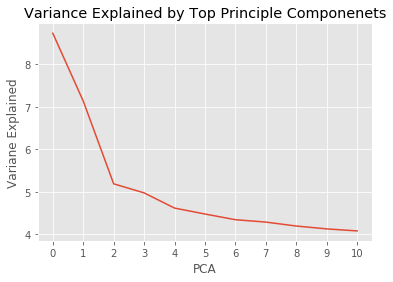

In [68]:
# Line plot
pca_range = np.arange(11)
pca_components = ['PCA %s' % i for i in pca_range]
plt.figure()
plt.plot(pca_range, pca.explained_variance_[:11])
xticks = plt.xticks(pca_range)
plt.xlabel('PCA')
plt.ylabel('Variane Explained')
plt.title('Variance Explained by Top Principle Componenets')

Text(0.5,1,'Variance Explained by Top Principle Componenets')

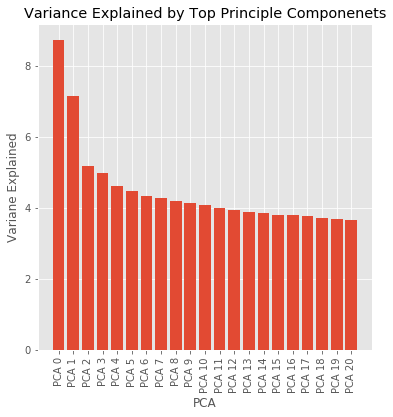

In [69]:
# Bar plot
pca_range = np.arange(21)
pca_names = ['PCA %s' % i for i in pca_range]

plt.figure(figsize = (6,6))
plt.bar(pca_range, pca.explained_variance_[:21])
xticks = plt.xticks(pca_range, pca_names, rotation = 90)
plt.xlabel('PCA')
plt.ylabel('Variane Explained')
plt.title('Variance Explained by Top Principle Componenets')

## 5. Find similar reviews

### Similar review search engine

In [123]:
import numpy as np

# We will need these helper methods pretty soon

def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["cat", "pig"]
    '''
    return [labels[i] for i in np.argsort(lst)[-1][:n]]  # np.argsort by default sorts values in ascending order

def get_bottom_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the lowest n values.
    Return the labels for each of these indices.

    e.g.
    lst = [7, 3, 2, 4, 1]
    n = 2
    labels = ["cat", "dog", "mouse", "pig", "rabbit"]
    output: ["mouse", "rabbit"]
    '''
    return [labels[i] for i in np.argsort(lst)[::1][:n]]

In [124]:
# Let's use cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [155]:
# Draw an/some arbitrary review from test (unseen in training) documents
sample_index = np.random.choice(test_X.shape[0], 1)
sample = test_X[sample_index]
sample

array(['Karen and Vanessa are the best !!! \nAfter losing way to much money in the casino, they can put a smile on your face!!!\nBest buffet on the strip !!\nThanks to both of you for making us laugh...\nAnnette was our server and she was awesome.'],
      dtype=object)

In [156]:
# Transform the drawn review(s) to vector(s)
vectorized_sample = vectorizer.transform(sample).toarray()
vectorized_sample.shape

(1, 1000)

In [157]:
# Calculate the similarity score(s) between vector(s) and training vectors
similarity_score = cosine_similarity(vectorized_sample, vectorized_train_X)
similarity_score.shape

(1, 975)

In [174]:
# Let's find top 5 similar reviews
n = 5
get_top_values(similarity_score, n, train_X)

['Best buffet in Vegas. Worth the money. Love the Delmar who makes the street tacos, meat station, seafood, desert bar, and pasta bar...and really all of it. A must visit on your Vegas trips.',
 "Really amazing! Totally worth the price but I recommend coming early because the line is always long. I also feel like you get more out of your experience if you come with friends and family because you'll stay longer and eat more in between talking. \n\nThe options are pretty much endless!",
 "This by far is the best buffet I've been to. Yes, it's very pricey ($50 for brunch) but so worth it when you see the spread. There's the usual crab legs, Chinese food, sushi, meat station but then there's the taco bar, noodle bar, dim sum, Spanish food and so much more. It was a bit overwhelming but I managed to eat a little bit of everything.\n\nMy most favorite was the congee. I was so happy to see Chinese donuts which was so crispy, fried scallion, and dried shredded pork - the good brand! \n\nI also

In [150]:
print('Our search query:')
print() # To be added

Our search query:



In [159]:
print('Most %s similar reviews:' % n)
print()  # To be added

Most 5 similar reviews:



### Q: Does the result make sense to you?

A: Results make sense in this particular sample drawn (all of them are saying how amazing the buffets are). However, when we change the samples, some of them do not make much sense. 

## 6. Classifying positive/negative review without/with PCA preprocessing

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [160]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C=0.01)
logistic.fit(standardized_train_X, train_y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [161]:
# Get score for training set
logistic.score(standardized_train_X, train_y)

0.9897435897435898

In [162]:
# Get score for test set
logistic.score(standardized_test_X, test_y)

0.7231503579952268

- We observe an over fitting (even after adding regularization factor)

#### What are the key features (words) that make positive prediction?

In [172]:
# Let's find it out by ranking
n = 20
get_top_values(abs(logistic.coef_), n, vectorizer.get_feature_names())

['miss',
 '35',
 'maybe',
 'sections',
 'review',
 'reason',
 'matter',
 'splurge',
 'im',
 'min',
 '58',
 'plentiful',
 'crawfish',
 'waitress',
 'biggest',
 'nearly',
 'plate',
 'offers',
 'right',
 'large']

#### Logistic Regression on PCA transformed X

In [175]:
# Build a Logistic Regression Classifier, train with PCA tranformed X
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(reduced_train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [176]:
# Get score for training set
logistic.score(reduced_train_X, train_y)

0.8041025641025641

In [177]:
# Get score for test set, REMEMBER to use PCA-transformed X!
logistic.score(reduced_test_X, test_y)

0.7494033412887828

- No overfitting problem with PCA, and test performance better than before PCA
- Enhanced model performance by reducing overfitting

#### What are the key features (words) that make positive prediction?

In [178]:
# Let's find it out by ranking
n = 20
get_top_values(abs(logistic.coef_), n, vectorizer.get_feature_names())

['ago',
 'amazing',
 '65',
 '11',
 '20',
 'advice',
 '500',
 'add',
 '15',
 'appreciate',
 '70',
 'ambience',
 'additional',
 '60',
 '99',
 '55',
 'able',
 'absolute',
 '90',
 '40']

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

- Non-PCA preprocessing resulted in overfitting. Even after tuning logistic regression regularization parameter C, the overfitting problem still persists. 
- However, after PCA, the accuracy on training and testing are similar, and even though training performance dropped, testing performance actually improved

#### You can plot the coefficients against principal components


In [307]:
logistic.coef_[0]

array([-0.24267833, -0.36817998, -0.10296049, -0.54765805,  0.00200037,
        0.12743619, -0.01468283,  0.02858329, -0.19097502,  0.11663203,
        0.15381602, -0.13050191,  0.24914886,  0.11502306,  0.20062103,
        0.0151763 ,  0.04184789, -0.15442742, -0.03324413,  0.01275794,
        0.00879604,  0.07516621,  0.07774259,  0.04738318,  0.12682822,
       -0.0071766 , -0.07480395,  0.05612085, -0.08485078,  0.11868501,
        0.13022442,  0.07286711, -0.14470518,  0.01885199, -0.0708686 ,
        0.03855273,  0.00089622, -0.10763877,  0.0738324 , -0.12073407,
       -0.15025527,  0.09034053, -0.02588324, -0.03224959, -0.14496386,
        0.01169957, -0.07731478,  0.11880631, -0.01460558, -0.03921041])

Text(0.5,1,'PCA and Corresponding Coefficients')

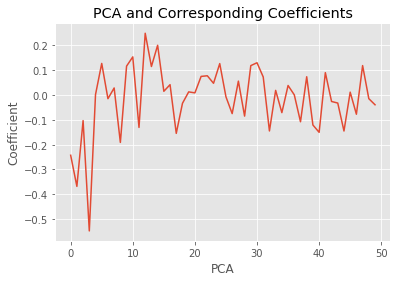

In [330]:
# Plot coefficients against principle components
plt.figure()
plt.plot(np.arange(n_components), logistic.coef_[0])
t = np.arange(pca.n_components_)
ax.set_xticks(t)

plt.xlabel('PCA')
plt.ylabel('Coefficient')
plt.title('PCA and Corresponding Coefficients')

In [324]:
# Bar plot of coefficients against principle components
pca_range = np.arange(pca.n_components_)+1
pca_names = ['PC %s' % i for i in pca_range]

df_coeffs = pd.DataFrame(list(zip(pca_names, logistic.coef_.flatten()))).sort_values(by = [1], ascending = False)
df_coeffs.columns = ['PCs', 'coeff']
df_coeffs.head(5)

,PCs,coeff
12,PC 13,0.249149
14,PC 15,0.200621
10,PC 11,0.153816
30,PC 31,0.130224
5,PC 6,0.127436


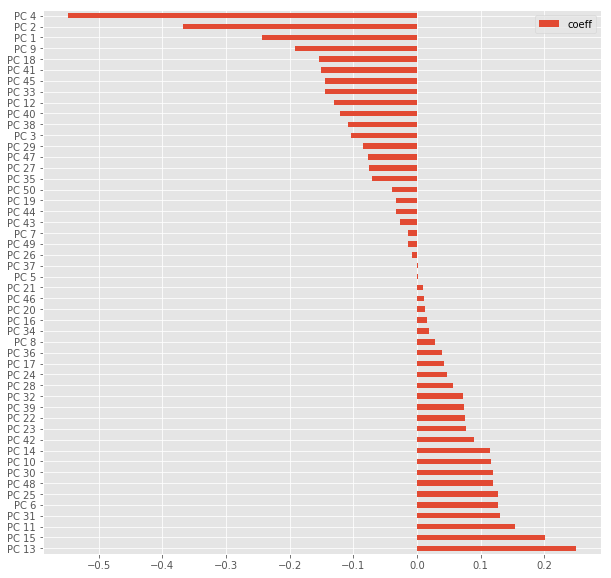

In [325]:
# Able to visalize 'importance' better
ax = df_coeffs.plot.barh(figsize = (10,10))
t = np.arange(pca.n_components_)
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['PCs'])
plt.show()

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [498]:
# Build a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

# # Choose some parameter combinations to try and define scroing used for grid search
param_grid = {'n_estimators': [20,50,100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini','entropy'],
              'max_depth': [15,20,25], 
              'min_samples_leaf': [2,3,5,10,20],
              'n_jobs':[-1]
             }
forest = RandomForestClassifier()
score_type = make_scorer(accuracy_score)

# Run grid search
grid = GridSearchCV(forest, param_grid, cv=5, scoring = score_type)
grid = grid.fit(standardized_train_X, train_y)

# Re-train random forest with best parameters
forest = grid.best_estimator_

# Fit on training data
forest.fit(standardized_train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [499]:
# Get score for training set
forest.score(standardized_train_X, train_y)

0.9005128205128206

In [500]:
# Get score for test set
forest.score(standardized_test_X, test_y)

0.7231503579952268

#### Use (Stardardized + PCA) tf-idf vectors as features

In [501]:
# Build a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
param_grid = {'n_estimators': [20,50,100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini','entropy'],
              'max_depth': [15,20,25], 
              'min_samples_leaf': [2,3,5,10,20],
              'n_jobs':[-1]
             }
score_type = make_scorer(accuracy_score)

grid = GridSearchCV(forest, param_grid, scoring = score_type)
grid = grid.fit(reduced_train_X, train_y)

forest = grid.best_estimator_
forest.fit(reduced_train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [502]:
# Get score for training set
forest.score(reduced_train_X, train_y)

0.9969230769230769

In [503]:
# Get score for test set, REMEMBER to use PCA-transformed X!
forest.score(reduced_test_X, test_y)

0.7350835322195705

#### Q: What do you see from the training result and the test result?

- A: Overfitting is still present but less than tha for logistic regression (random forest more resistant to multicollinearity?). Reducing PCA did not significantly improve overfitting.

#### You can plot the feature importances against principal components


Text(0.5,1,'PCA and Corresponding Coefficients')

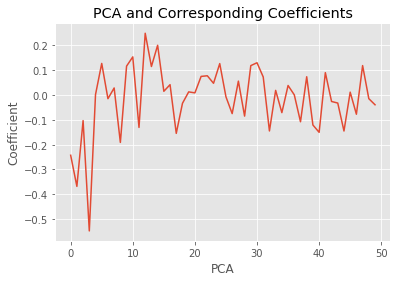

In [504]:
# Plot coefficients against principle components
plt.figure()
plt.plot(np.arange(n_components), logistic.coef_[0])
t = np.arange(pca.n_components_)
ax.set_xticks(t)

plt.xlabel('PCA')
plt.ylabel('Coefficient')
plt.title('PCA and Corresponding Coefficients')

## Extra Credit #1: Can you cluster restaurants from their category information?
Hint: a business may have mutiple categories, e.g. a restaurant can have both "Restaurants" and "Korean"

In [2]:
# To be implemented

## Extra Credit #2: Can you try different distance/similarity metrics for clusterings, e.g. Pearson correlation, Jaccard distance, etc. 

Hint: You can take a look at [scipy](http://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist) documentations to use other distances

#### Q: How do you compare with Cosine distance or Euclidean distance?

In [ ]:
# To be implemented

## Extra Credit #3: Can you cluster categories from business entities? What does it mean by a cluster?
Hint: Think the example where words can be clustered from the transposed tf-idf matrix.

In [ ]:
# To be implemented

## Extra Credit #4: What are the characteristics of each of the clustered  ? For each cluster, which restaurant can best represent ("define") its cluster?
Hint: how to interpret "best"?

In [ ]:
# To be implemented

## Extra Credit #5: Can you think of other use cases that clustering can be used? 
Hint: of course you can make use of other yelp dataset. You can try anything you want as long as you can explain it.

In [ ]:
# To be implemented